In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import re
import preprocessing

In [2]:
train_data = pd.read_csv('./data/vfdata.csv')

In [3]:
train_data[:5]

,txt,label
0,혹시 여기가 상담 센터 맞나요? 네 맞습니다. 무엇을 도와드릴까요? 뭐 하나만 여쭤...,0
1,OO은행입니다. 무엇을 도와드릴까요 고객님? 매월 정기적으로 송금하고 싶은데요 자동...,0
2,물어볼게 있어서요. 무엇이 궁금하신가요? 청약통장에 대해 물어 볼게 있어서요. 청약...,0
3,안녕하세요 선생님 코호트 센터 입니다. 네 안녕하세요. 다시 해봤는데 여전히 안 ...,0
4,행복을 전하는 ㅇㅇㅇㅇ입니다. 여보세요. 네 안녕하세요 고객님 무엇을 도와드릴까요...,0


In [4]:
print(len(train_data))

1670


In [5]:
train_data['txt'].nunique(), train_data['label'].nunique()
# 중복 없음

(1670, 2)

In [6]:
print(train_data.isnull().values.any())
# null값 없음

False


In [7]:
# 한글과 공백을 제거하고 모두 제거
train_data['txt'] = train_data['txt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

c:\Program Files\Anaconda3\envs\nophising\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,txt,label
0,혹시 여기가 상담 센터 맞나요 네 맞습니다 무엇을 도와드릴까요 뭐 하나만 여쭤보려고...,0
1,은행입니다 무엇을 도와드릴까요 고객님 매월 정기적으로 송금하고 싶은데요 자동이체 서...,0
2,물어볼게 있어서요 무엇이 궁금하신가요 청약통장에 대해 물어 볼게 있어서요 청약통장 ...,0
3,안녕하세요 선생님 코호트 센터 입니다 네 안녕하세요 다시 해봤는데 여전히 안 되네...,0
4,행복을 전하는 ㅇㅇㅇㅇ입니다 여보세요 네 안녕하세요 고객님 무엇을 도와드릴까요 네...,0


In [8]:
# 공백(whitespace)만 있거나 빈 값을 가진 행이 있다면 Null 값으로 변경후 확인
train_data['txt'] = train_data['txt'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['txt'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())
# 없음

txt      0
label    0
dtype: int64


c:\Program Files\Anaconda3\envs\nophising\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


# 모든 전처리 테스트에 적용

test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거 <br>
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행 <br>
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경 <br>
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경<br>
test_data = test_data.dropna(how='any') # Null 값 제거 <br>
print('전처리 후 테스트용 샘플의 개수 :',len(test_data)) 

In [9]:
import preprocessing

stopword = preprocessing.make_stopword() # 불용어 사전 생성
print('불용어 사전 생성 완료.')
train_data['txt'] = train_data['txt'].apply(lambda x : preprocessing.tokenize(x)) # 토큰화
print('토큰화 완료 (Mecab)')
train_data['txt'] = train_data['txt'].apply(lambda x : preprocessing.del_stopword(x, stopword)) # 불용어 제거
print('불용어 제거 완료.')

print(train_data[:3])

불용어 사전 생성 완료.
토큰화 완료 (Mecab)
불용어 제거 완료.
                                                 txt  label
0  [상담, 센터, 맞, 나요, 맞, 도와드릴까요, 뭐, 만, 여쭤, 보, 려고, 연락...      0
1  [은행, 입니다, 도와, 드릴까요, 고객, 님, 매월, 정기, 적, 송금, 고, 싶...      0
2  [물어볼, 게, 있, 어서요, 궁금, 신, 가요, 청약, 통장, 대해, 물, 볼, ...      0


In [10]:
train_X = train_data['txt']

In [11]:
train_y = train_data['label']

In [23]:
train_X, train_y

(0       [상담, 센터, 맞, 나요, 맞, 도와드릴까요, 뭐, 만, 여쭤, 보, 려고, 연락...
 1       [은행, 입니다, 도와, 드릴까요, 고객, 님, 매월, 정기, 적, 송금, 고, 싶...
 2       [물어볼, 게, 있, 어서요, 궁금, 신, 가요, 청약, 통장, 대해, 물, 볼, ...
 3       [안녕, 세요, 선생, 님, 코호트, 센터, 입니다, 안녕, 세요, 다시, 해, 봤...
 4       [행복, 전하, 는, ㅇㅇㅇㅇ입니다, 여보세요, 안녕, 세요, 고객, 님, 도와드릴...
                               ...                        
 1665    [고객, 님, 농협, 캐피탈, 인데요, 희, 대출, 조건, 완화, 돼서, 연락, 드...
 1666    [사건, 거기, 자세히, 나오, 거든요, 그거, 확인, 할, 수, 있, 는, 사건,...
 1667    [ㅇㅇㅇㅇ, ㅇㅇㅇ입니다, 주문, 려고, 는데, 구만, 천, 백, 원, 결제, 가능...
 1668    [ㅇㅇ쇼핑, 상, 담사, 입니다, 전화, 끊겨서, 다시, 연락, 드렸, 주문, 안,...
 1669    [본인, 께서, 는, 서울, 구로구, 거주, 는, 조상수, 라는, 사람, 알, 고,...
 Name: txt, Length: 1670, dtype: object,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1665    1
 1666    1
 1667    0
 1668    0
 1669    1
 Name: label, Length: 1670, dtype: int64)

In [24]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
train_data['txt'] = train_data['txt'].apply(lambda x : preprocessing.del_stopword(x, stopwords)) # 불용어 제거 ('는' 과 같은 불용어들이 좀 빠져있음 왜빠져있는지는 나도 몰?루)
print('불용어 제거 완료.')

불용어 제거 완료.


In [25]:
train_X = train_data['txt']
train_y = train_data['label']
train_X, train_y

(0       [상담, 센터, 맞, 나요, 맞, 도와드릴까요, 뭐, 만, 여쭤, 보, 려고, 연락...
 1       [은행, 입니다, 도와, 드릴까요, 고객, 님, 매월, 정기, 적, 송금, 고, 싶...
 2       [물어볼, 게, 있, 어서요, 궁금, 신, 가요, 청약, 통장, 대해, 물, 볼, ...
 3       [안녕, 세요, 선생, 님, 코호트, 센터, 입니다, 안녕, 세요, 다시, 해, 봤...
 4       [행복, 전하, ㅇㅇㅇㅇ입니다, 여보세요, 안녕, 세요, 고객, 님, 도와드릴까요,...
                               ...                        
 1665    [고객, 님, 농협, 캐피탈, 인데요, 희, 대출, 조건, 완화, 돼서, 연락, 드...
 1666    [사건, 거기, 자세히, 나오, 거든요, 그거, 확인, 할, 수, 있, 사건, 번호...
 1667    [ㅇㅇㅇㅇ, ㅇㅇㅇ입니다, 주문, 려고, 는데, 구만, 천, 백, 원, 결제, 가능...
 1668    [ㅇㅇ쇼핑, 상, 담사, 입니다, 전화, 끊겨서, 다시, 연락, 드렸, 주문, 안,...
 1669    [본인, 께서, 서울, 구로구, 거주, 조상수, 라는, 사람, 알, 고, 계십니까,...
 Name: txt, Length: 1670, dtype: object,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1665    1
 1666    1
 1667    0
 1668    0
 1669    1
 Name: label, Length: 1670, dtype: int64)

In [12]:
len(train_X), len(train_y)

(1670, 1670)

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

In [28]:
print(tokenizer.word_index)

{'시': 1, '고': 2, '있': 3, '되': 4, '거': 5, '님': 6, '해': 7, '겠': 8, '면': 9, '지금': 10, '고객': 11, '주': 12, '본인': 13, '요': 14, '만': 15, '확인': 16, '없': 17, '안': 18, '세요': 19, '말씀': 20, '게': 21, '받': 22, '죠': 23, '이제': 24, '어요': 25, '드리': 26, '알': 27, '합니다': 28, '신': 29, '보': 30, '다': 31, '수': 32, '통장': 33, '는데': 34, '맞': 35, '카드': 36, '번호': 37, '원': 38, '은행': 39, '기': 40, '적': 41, '지': 42, '셨': 43, '고요': 44, '전화': 45, '뭐': 46, '나요': 47, '입니다': 48, '계좌': 49, '부분': 50, '께서': 51, '할': 52, '부탁': 53, '으시': 54, '분': 55, '했': 56, '가능': 57, '에요': 58, '감사': 59, '그러': 60, '같': 61, '때문': 62, '실': 63, '드립니다': 64, '사용': 65, '가지': 66, '연락': 67, '사건': 68, '진행': 69, '금융': 70, '정보': 71, '된': 72, '라고': 73, '상품': 74, '번': 75, '처리': 76, '해서': 77, 'ㅇㅇㅇㅇ': 78, '주문': 79, '인': 80, '었': 81, '십니까': 82, 'ㅇㅇㅇ': 83, '됩니다': 84, '구요': 85, '아요': 86, '쪽': 87, '조사': 88, '내': 89, '니까': 90, '서': 91, '중': 92, '면은': 93, '않': 94, '대출': 95, '으신': 96, '농협': 97, '드렸': 98, '거든요': 99, '결제': 100, '경우': 101, '한테': 102, '이거': 103, '정도': 1

In [29]:
total_cnt = len(tokenizer.word_index) # 단어의 수
print(total_cnt)

16087


In [14]:
threshold = 3
# 단어의 수
total_cnt = len(tokenizer.word_index) 
# threshold 보다 등장 빈도수가 작은 단어의 개수 카운트
rare_cnt = 0
# 훈련 데이터의 전체 단어 빈도수 총 합
total_freq = 0
# 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총합
rare_freq = 0

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq += value

    if(value < threshold):
        rare_cnt += 1
        rare_freq += value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 16092
등장 빈도가 2번 이하인 희귀 단어의 수: 9508
단어 집합에서 희귀 단어의 비율: 59.085259756400696
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9521296109622


In [15]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6585


In [16]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(train_X)
train_X = tokenizer.texts_to_sequences(train_X)

In [17]:
print(train_X[:3])

[[305, 254, 39, 51, 39, 294, 50, 18, 280, 34, 354, 71, 102, 201, 327, 277, 3262, 73, 5, 1, 5406, 2009, 2468, 1461, 1, 1461, 313, 66, 350, 9, 14, 2, 1, 7, 27, 371, 147, 16, 115, 358, 18, 16, 7, 21, 278, 2468, 1461, 1, 471, 2468, 2009, 52, 1294, 155, 228, 166, 2885, 17, 1258, 159, 51, 2192, 42, 155, 686, 85, 1798, 311, 127, 36, 4, 166, 274, 146, 21, 100, 169, 119, 4, 4, 58, 358, 229, 5406, 2009, 1461, 1638, 1, 1897, 1, 313, 2135, 11, 945, 52, 115, 358, 350, 6, 334, 219, 35, 63, 32, 327, 17, 7, 4, 204, 109, 274, 9, 14, 23], [43, 52, 112, 203, 13, 8, 2068, 1951, 45, 640, 3, 317, 572, 312, 1008, 316, 24, 2, 1, 7, 39, 58, 27, 136, 65, 166, 312, 1008, 1, 908, 226, 4193, 45, 965, 33, 53, 402, 67, 1952, 17, 316, 52, 39, 90, 744, 10, 1490, 312, 402, 1, 265, 295, 203, 1138, 2749, 14, 23, 234, 213, 284, 1614, 2, 89, 1197, 29, 426, 2, 89, 402, 714, 615, 2, 89, 60, 29, 312, 1008, 714, 615, 2, 11, 88, 343, 644, 408, 166, 274, 146, 4, 654, 16, 16, 63, 12, 748, 487, 245, 23], [2469, 25, 4, 889, 327, 33

In [36]:
drop_train = [index for index, sentence in enumerate(train_X) if len(sentence) < 1]

In [37]:
drop_train # 빈 인덱스 존재 x
train_X = np.delete(train_X, drop_train, axis=0)
train_y = np.delete(train_y, drop_train, axis=0)

c:\Users\jonghan\anaconda3\envs\dacon\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


텍스트 최대 길이 : 7332
텍스트 평균 길이 : 335.0760479041916


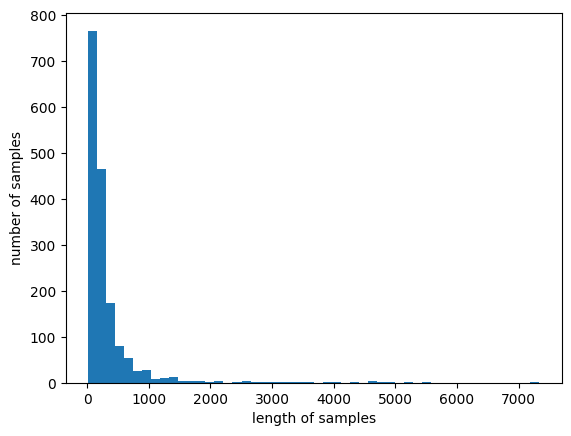

In [38]:
print('텍스트 최대 길이 :',max(len(review) for review in train_X))
print('텍스트 평균 길이 :',sum(map(len, train_X))/len(train_X))
plt.hist([len(review) for review in train_X], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [40]:
max_len = 1000
below_threshold_len(max_len, train_X)
# 약 95%의 보이스피싱문이 1000 이하의 길이를 가짐

전체 샘플 중 길이가 1000 이하인 샘플의 비율: 94.73053892215569


In [41]:
# 모든 샘플의 길이를 1000으로 맞추기
train_X = pad_sequences(train_X, maxlen=max_len)

# LSTM

마지막 시점에서 두 개의 선택지중 하나를 예측하는 이진 분류 문제를 수행하는 모델 <br><br>
출력층에 로지스틱 회귀를 사용해야 하므로 활성화 함수로는 Sigmoid 함수를 사용 <br><br>
손실 함수로는 Cross Entropy 함수를 사용

In [18]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
embedding_dim = 100 # 임베딩 벡터의 차원
hidden_units = 128 # 은닉 상태의 크기

In [52]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

검증 데이터 손실 val_loss 가 증가하면 과적합 징후이므로, 검증 데이터 손실이 4회 증가하면 학습을 조기 종료

In [53]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [54]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history = model.fit(train_X, train_y, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
21/21 [==============================] - ETA: 0s - loss: 0.6354 - acc: 0.6751
Epoch 1: val_acc improved from -inf to 0.98503, saving model to best_model.h5
21/21 [==============================] - 35s 2s/step - loss: 0.6354 - acc: 0.6751 - val_loss: 0.1727 - val_acc: 0.9850
Epoch 2/15
21/21 [==============================] - ETA: 0s - loss: 0.2664 - acc: 0.9439
Epoch 2: val_acc improved from 0.98503 to 0.99102, saving model to best_model.h5
21/21 [==============================] - 33s 2s/step - loss: 0.2664 - acc: 0.9439 - val_loss: 0.0695 - val_acc: 0.9910
Epoch 3/15
21/21 [==============================] - ETA: 0s - loss: 0.0766 - acc: 0.9820
Epoch 3: val_acc did not improve from 0.99102
21/21 [==============================] - 37s 2s/step - loss: 0.0766 - acc: 0.9820 - val_loss: 0.2150 - val_acc: 0.9311
Epoch 4/15
21/21 [==============================] - ETA: 0s - loss: 0.0724 - acc: 0.9798
Epoch 4: val_acc did not improve from 0.99102
21/21 [=============================

In [23]:
test_data = pd.read_excel("./data/fraudscenario.xlsx")
test_data

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [22]:
# test_data['txt'] = test_data['txt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# test_data['txt'] = test_data['txt'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
# test_data['txt'].replace('', np.nan, inplace=True)
# stopword = preprocessing.make_stopword() # 불용어 사전 생성
# print('불용어 사전 생성 완료.')
# test_data['txt'] = test_data['txt'].apply(lambda x : preprocessing.tokenize(x)) # 토큰화
# print('토큰화 완료 (Mecab)')
# test_data['txt'] = test_data['txt'].apply(lambda x : preprocessing.del_stopword(x, stopword)) # 불용어 제거
# print('불용어 제거 완료.')
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
# test_data['txt'] = test_data['txt'].apply(lambda x : preprocessing.del_stopword(x, stopwords)) # 불용어 제거 ('는' 과 같은 불용어들이 좀 빠져있음 왜빠져있는지는 나도 몰?루)
# print('불용어 제거 완료.')
# test_X = test_data['txt']
# test_y = test_data['label']
# test_X, test_y
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(test_X)

test_x= test_data['conversation']

stopword = preprocessing.make_stopword() # 불용어 사전 생성

loaded_model = load_model('best_model.h5')

def sentiment_predict(new_sentence):
    # 정규식을 사용하여 문자열 처리
    new_sentence = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", new_sentence)
    new_sentence = re.sub('^ +', '', new_sentence)
    new_sentence = preprocessing.tokenize(new_sentence) # 토큰화
    new_sentence = preprocessing.del_stopword(new_sentence, stopword) # 불용어 제거
    stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] # 추가 불용어
    new_sentence = preprocessing.del_stopword(new_sentence, stopwords) # 추가 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    percentage = score*100 # 보이스 피싱 확률 계산
    if(percentage >= 75):
        print("{:.2f}% 확률로 보이스피싱입니다.\n".format(score * 100))
        print("*경고* 보이스 피싱 입니다. 즉시 경찰서에 연락하거나 전화를 끊으십시오.")
    elif(percentage >= 50):
        print("{:.2f}% 확률로 보이스피싱입니다.\n".format(score * 100))
        print("*주의* 보이스피싱 위험 단계 입니다. 보이스피싱 같다면 전화를 끊으십시오.")
    elif(percentage >= 25):
        print("{:.2f}% 확률로 보이스피싱입니다.\n".format(score * 100))
        print("보이스 피싱 의심 단계 입니다.")
    else:
        print("{:.2f}% 확률로 보이스피싱입니다.\n".format(score * 100))
        print("보이스 피싱 안전 단계 입니다.")

    
# for value in test_x:
#     sentiment_predict(value)




NameError: name 'test_data' is not defined

In [27]:
import pickle
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [28]:
loaded_model = load_model('best_model.h5')

def sentiment_predict(new_sentence):
    # 정규식을 사용하여 문자열 처리
    new_sentence = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", new_sentence)
    new_sentence = re.sub('^ +', '', new_sentence)
    new_sentence = preprocessing.tokenize(new_sentence) # 토큰화
    new_sentence = preprocessing.del_stopword(new_sentence, stopword) # 불용어 제거
    stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] # 추가 불용어
    new_sentence = preprocessing.del_stopword(new_sentence, stopwords) # 추가 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    percentage = score*100 # 보이스 피싱 확률 계산
    if(percentage >= 75):
        print("{:.2f}% 확률로 보이스피싱입니다.\n".format(score * 100))
        print("*경고* 보이스 피싱 입니다. 즉시 경찰서에 연락하거나 전화를 끊으십시오.")
    elif(percentage >= 50):
        print("{:.2f}% 확률로 보이스피싱입니다.\n".format(score * 100))
        print("*주의* 보이스피싱 위험 단계 입니다. 보이스피싱 같다면 전화를 끊으십시오.")
    elif(percentage >= 25):
        print("{:.2f}% 확률로 보이스피싱입니다.\n".format(score * 100))
        print("보이스 피싱 의심 단계 입니다.")
    else:
        print("{:.2f}% 확률로 보이스피싱입니다.\n".format(score * 100))
        print("보이스 피싱 안전 단계 입니다.")

In [29]:
sentiment_predict("엄마 집에 밥 있어? 없어? 꼬들밥으로 해줘")
sentiment_predict("안녕하세요, 혹시 전종한씨 본인 되십니까? 아 예 저는 서울중앙지검 유승민 검사입니다.")
sentiment_predict("다름이 아니라 지금 전종한씨 본인 계좌가 범죄에 연루되어서 조사 차원에서 연락 드렸습니다.")
sentiment_predict("아오 한주시치 빨리 서버 파")
sentiment_predict("일단은 여기서 킵을 할까?")

NameError: name 'max_len' is not defined

In [4]:
loaded_model = load_model('best_model.h5')
# print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x, y)[1]))